## India Liver Patient Dataset (ILDP)

### Part (1/5): Descriptive Statistics and Visualization

On these notebooks (5 total) we analyze Indian Liver Disease dataset which is publicly available on[ UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/ILPD+%28Indian+Liver+Patient+Dataset%29). The first notebook contains some basic descriptive statistic techniques and some Exploratory Data Analysis, as well.  
## Import the modules

In [1]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
from sklearn import preprocessing 
from scipy import stats
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr 
import matplotlib.pyplot as plt
%matplotlib inline

### install some useful packages

In [2]:
#!pip install plotly
#!pip install cufflinks

In [3]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

## Import the csv file

In [4]:
df = pd.read_csv('../input/indian-liver-patient-records/indian_liver_patient.csv')
df.head(3) # dataframe snapshot

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1


In [5]:
df.columns #list of dataframe's columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [6]:
df.shape

(583, 11)

The dataset contains 583 instances, 8 biological parameters, 2 demographic paramenters (Age and Gender) and 1 target value. Target value "Dataset" contains 1 for positive cases and 2 for negative cases. 

In [7]:
df.rename(columns = {'Dataset':'liver_disease'}, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  liver_disease               583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


All the independent variables are numerical, except from Gender attribute with is categorical.

### Descriptive Statistics
In the dataframe below we can see some fundamental statistical measures such as: mean, std, min, max, quantiles ect.

In [9]:
df.iloc[:,:-1].describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


## Missing values 

<AxesSubplot:>

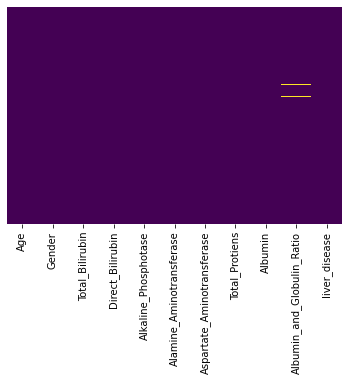

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
liver_disease                 0
dtype: int64

There is only a small percentage of missing values in the dataset. Also, only the feature *Albumin_and_Globulin_Ratio* contains missing values. We will replace missing values with '?'

In [12]:
df.fillna('?', inplace = True)

In [13]:
df[df["Albumin_and_Globulin_Ratio"] == '?']

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,?,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,?,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,?,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,?,2


Despite the small percentage of missing values in the dataset, we are going to replace them with *class mean*. We will find the mean class value of each missing value and we will use it to replace it.

In [14]:
df_without_missing = df[df["Albumin_and_Globulin_Ratio"] != '?']

In [15]:
df_without_missing_class_1 = df_without_missing[df_without_missing['liver_disease'] == 1]
mean_dataset_class_1 = round(df_without_missing_class_1[df_without_missing_class_1['liver_disease'] == 1]['Albumin_and_Globulin_Ratio'].mean(),1)

Mean value calculation for Albumin_and_Globulin_Ratio feature for class 1 (positive)

In [16]:
print('mean value of Albumin_and_Globulin_Ratio in class 1: {}'.format(mean_dataset_class_1))

mean value of Albumin_and_Globulin_Ratio in class 1: 0.9


Mean value for feature Albumin_and_Globulin_Ratio for class 2 (negative)

In [17]:
df_without_missing_class_2 = df_without_missing[df_without_missing['liver_disease'] == 2]
mean_dataset_class_2 = round(df_without_missing_class_2[df_without_missing_class_2['liver_disease'] == 2]['Albumin_and_Globulin_Ratio'].mean(),1)
print('mean value of Albumin_and_Globulin_Ratio in class 2: {}'.format(mean_dataset_class_2))

mean value of Albumin_and_Globulin_Ratio in class 2: 1.0


Replace missing values

In [18]:
df[df["Albumin_and_Globulin_Ratio"] == '?']

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,?,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,?,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,?,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,?,2


In [19]:
df['Albumin_and_Globulin_Ratio'][209] = mean_dataset_class_1
df['Albumin_and_Globulin_Ratio'][241] = mean_dataset_class_1
df['Albumin_and_Globulin_Ratio'][253] = mean_dataset_class_2
df['Albumin_and_Globulin_Ratio'][312] = mean_dataset_class_2

Replace values of *liver_disease* target value. 
* 0 ---> liver disease negative class
* 1 ---> liver disease positive class

In [20]:
df['liver_disease'] = df['liver_disease'].replace(2,0)

In [21]:
df['liver_disease'] = df['liver_disease'].astype('category')

In [22]:
df['liver_disease'].value_counts()

1    416
0    167
Name: liver_disease, dtype: int64

In [23]:
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].astype('float')

### ~ end of preprocessing ~ 

## Exploratory Data Analysis (EDA)

### liver_disease target-value
countplot implementation

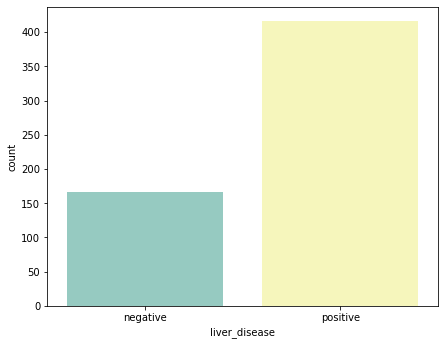

In [24]:
plt.figure(figsize=(7,5.5))
sns.countplot(x = 'liver_disease', data = df, palette='Set3')
plt.xticks(ticks = [0,1], labels = ['negative', 'positive']) 
plt.show()

In [25]:
patients_with = df['liver_disease'].value_counts().to_frame().iloc[0]
patients_without = df['liver_disease'].value_counts().to_frame().iloc[1]
print(f'{int(patients_with)} patients diagnosed with liver disease')
print(f'{int(patients_without)} patients not diagnosed with liver disease')

416 patients diagnosed with liver disease
167 patients not diagnosed with liver disease


In [26]:
v_c_dataset = df['liver_disease'].value_counts(normalize = True).to_frame()
v_c_dataset.iloc[0] = round(v_c_dataset.iloc[0] * 100, 2)
v_c_dataset.iloc[1] = round(v_c_dataset.iloc[1] * 100, 2)
v_c_dataset.rename(columns = {'liver_disease':'percentage'}, inplace = True)

In [27]:
v_c_d = df['liver_disease'].value_counts().to_frame()
v_c_d.rename(columns = {'liver_disease':'actual_num'}, inplace=True)
liver = pd.concat([v_c_dataset, v_c_d], axis = 1)

In [28]:
liver

,percentage,actual_num
1,71.36,416
0,28.64,167


From the dataframe above we can understand that our dataset is unbalanced. Most of the cases are positive (about 71%). This fact may affect classification models.

### Gender feature
gender feature contains exactly 2 values, *Male* and *Female*

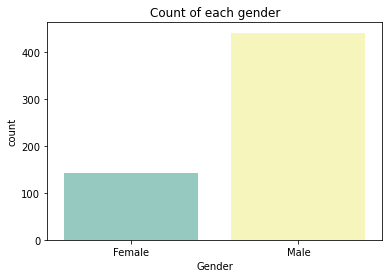

In [29]:
sns.countplot(x='Gender',data=df, palette="Set3")
plt.title('Count of each gender')
plt.show()

In [30]:
gender_num = df['Gender'].value_counts().to_frame()
gender_num.rename(columns = {'Gender':'gender_num'}, inplace  = True)
gender_perc = df['Gender'].value_counts(normalize = True).to_frame()
gender_perc.iloc[0] = round(gender_perc.iloc[0] * 100,2)
gender_perc.iloc[1] = round(gender_perc.iloc[1] * 100,2)
gender_perc.rename(columns = {'Gender':'gender_percentage'},inplace = True)

In [31]:
gender = pd.concat([gender_num, gender_perc], axis = 1)

In [32]:
gender

,gender_num,gender_percentage
Male,441,75.64
Female,142,24.36


Gender feature is unbalanced. About 76% of the whole cases are male patients
### Age feature

In [33]:
df['Age'].describe()

count    583.000000
mean      44.746141
std       16.189833
min        4.000000
25%       33.000000
50%       45.000000
75%       58.000000
max       90.000000
Name: Age, dtype: float64

The youngest patient is 4 years old, and the oldest 90 years old. By checking percentiles, min and max values we can conclude that *Age*   can be approached with the normal distribution. We use cufflinks to represent the distribution of Age.

In [34]:
df['Age'].iplot(kind = 'hist', color = 'red', xTitle = 'Age', yTitle = 'Frequence', title = 'Age-Distribution')

### live_disease - Gender - Age
We use visualization techniques in order to check for possible relations relations between *Age*, *Gender* and target variable.

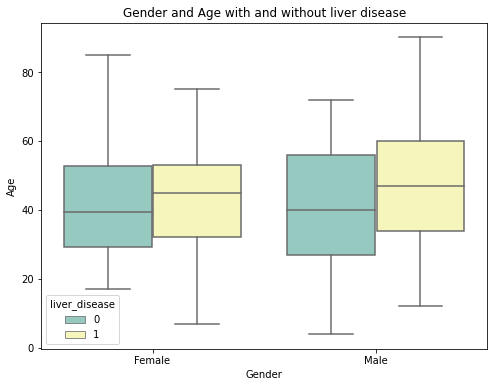

In [35]:
plt.figure(figsize = (8,6))
sns.boxplot(x = 'Gender', y = 'Age', hue = 'liver_disease', data = df, palette='Set3')
plt.title('Gender and Age with and without liver disease')
plt.show()

The presence or absence of the liver disease does not seem to be influenced by gender, ie each gender has relatively "shared" positive and negative cases. However, it is worth saying that both in women and men cases, the avarage age of positive diagnosed is higher than the avarage age of negative diagnosed.

In [36]:
male_age_des = df[df['Gender'] == 'Male'][['liver_disease','Age']]
print('male mean age diagnosed with or without liver disease')
male_age_des.groupby('liver_disease')['Age'].median().to_frame()

male mean age diagnosed with or without liver disease


,Age
liver_disease,
0,40
1,47


In [37]:
female_age_des = df[df['Gender'] == 'Female'][['liver_disease','Age']]
print('female mean age diagnosed with or without liver disease')
female_age_des.groupby('liver_disease')['Age'].median().to_frame()

female mean age diagnosed with or without liver disease


,Age
liver_disease,
0,39.5
1,45.0


In [38]:
print('percentage of positive women: {} %'.format(round(1-50/92,2)*100))
print('percentage of positive men: {} %'.format(round(1-117/324,2)*100))

percentage of positive women: 46.0 %
percentage of positive men: 64.0 %


**Conclusion:** Gender seems to affect the final diagnosis. Also, age affects the diagnosis but not in the same extend as gender.
### Total Bilirubin & Direct Bilirubin

A bilirubin test measures the amount of **total bilirubin** in your blood. It’s used to help find the cause of health conditions like jaundice, anemia, and liver disease. If your bilirubin levels are higher than normal, it’s a sign that either your red blood cells are breaking down at an unusual rate or that your liver isn’t breaking down waste properly and clearing the bilirubin from your blood. [[1]](https://www.webmd.com/a-to-z-guides/bilirubin-test)

A bilirubin test measures total bilirubin. It can also give levels of two different types of bilirubin: unconjugated and conjugated.

* For adults over 18, normal total bilirubin can be up to 1.2 milligrams per deciliter (mg/dl) of blood. 
* For those under 18, the normal level will be 1 mg/dl. Normal results for conjugated (direct) bilirubin should be less than 0.3 mg/dl. Men tend to have slightly higher bilirubin levels than women [[1]](http://www.webmd.com/a-to-z-guides/bilirubin-test)

In [39]:
df['Total_Bilirubin'].iplot(kind = 'hist', color = 'red', xTitle = 'Total_Bilirubin', yTitle = 'Frequency')

Most values of Total Bilirubin are in the range [0,5]. From the graph above this feature seems to have some outliers. 

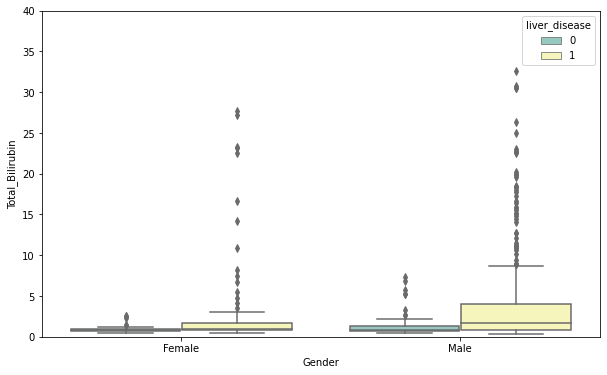

In [40]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'Gender', y = 'Total_Bilirubin',hue = 'liver_disease', data = df, palette = 'Set3')
plt.ylim(0,40)
plt.show()

The concentration of Total Bilirubin in the blood is higher in males (especially in ill men) than in women. Also, there are outliers, mainly on positive cases.

## Correlation between Total Bilirubin & Direct Bilirubin
Direct Bilirubin is part of Total Bilirubin so we suppose that they are not independent.

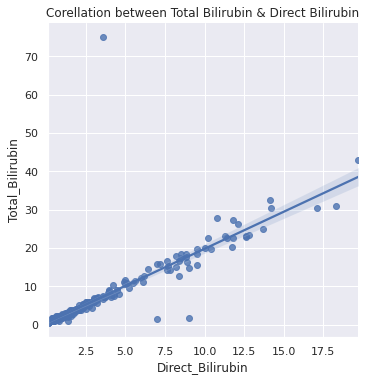

In [41]:
sns.set_theme()
sns.lmplot(x='Direct_Bilirubin',y='Total_Bilirubin',data=df)
plt.title('Corellation between Total Bilirubin & Direct Bilirubin')
plt.show()

In [42]:
corr, p_value = pearsonr(df['Total_Bilirubin'], df['Direct_Bilirubin']) 
print('Pearsons correlation between Total Bilirubin & Direct Bilirubin: %.3f' % corr +' and p-value: {}'.format(p_value) ) 

Pearsons correlation between Total Bilirubin & Direct Bilirubin: 0.875 and p-value: 7.873553178026405e-185


There is a positive, strong correlation between these two features of our dataset. We can confirm it by taking into consideration pearson's correlation(about 87.5%) and p-value which is <<0.001.
### Alamine Aminotransferase & Aspartate Aminotransferase

Aspartate Aminotransferase (AST), is a pyridoxal phosphate (PLP)-dependent transaminase enzyme. AST is found in the liver, heart, skeletal muscle, kidneys, brain, and red blood cells. Serum AST level, serum ALT (alanine transaminase) level, and their ratio (AST/ALT ratio) are commonly measured clinically as biomarkers for liver health [[2]](https://gpnotebook.com/simplepage.cfm?ID=322240579).

Aspartate Aminotransferase

* female 6-34 IU/L

* male 8-40 IU/L



In [43]:
df['Alamine_Aminotransferase'].iplot(kind='hist', color = 'red', xTitle = 'Alamine_Aminotransferase', yTitle = 'Frequency', title = 'Distribution of enzyme Alamine_Aminotransferase')

In [44]:
df['Aspartate_Aminotransferase'].iplot(kind='hist', color = 'red', xTitle = 'Aspartate_Aminotransferase', yTitle = 'Frequency', title = 'Distribution of Enzyme Aspartate_Aminotransferase')

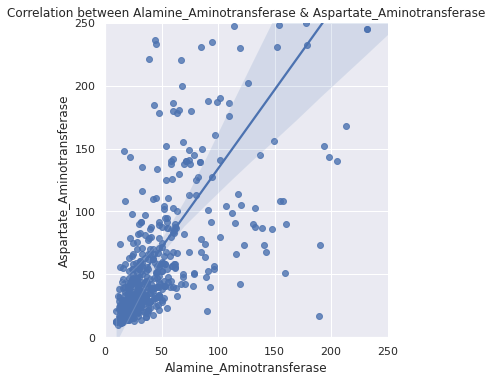

In [45]:
sns.lmplot(x='Alamine_Aminotransferase',y='Aspartate_Aminotransferase',data=df)
plt.title('Correlation between Alamine_Aminotransferase & Aspartate_Aminotransferase')
plt.xlim(0,250)
plt.ylim(0,250)
plt.show()

In [46]:
coor, p_value = pearsonr(df['Alamine_Aminotransferase'], df['Aspartate_Aminotransferase']) 
print('Pearsons correlation: %.3f' % coor + 'and p-value: {}'.format(p_value)) 

Pearsons correlation: 0.792and p-value: 1.352081000919862e-126


Taking into consideration the plot above and the pearson's correlation between Alamine Aminotransferase & Aspartate Aminotransferase, we conclude that there is a high, positive corellation  (about 79.2%)

### Albumin and Globulin Ratio & Albumin
Two classes of proteins are found in the blood, albumin and globulin.

Albumin is made by the liver and makes up about 60% of the total protein. Albumin keeps fluid from leaking out of blood vessels, nourishes tissues, and transports hormones, vitamins, drugs, and substances like calcium throughout the body.

Globulins make up the remaining 40% of proteins in the blood. The globulins are a varied group of proteins, some produced by the liver and some by the immune system. They help fight infection and transport nutrients [[3]](https://labtestsonline.org/tests/total-protein-albumin-globulin-ag-ratio).

Albumin (or albumin) is one of the two major protein fractions in the blood. Its main functions are to maintain bulking pressure and to transport bilirubin, fatty acids, drugs, hormones and other substances that are insoluble in water. Proteins are normally absorbed almost completely by the kidneys and are practically undetectable in the urine. Therefore, the presence of detectable albumin or protein in the urine is indicative of abnormal renal function [[4]](https://athenslab.gr/diagnostikes-exetaseis/alvoumini-32).



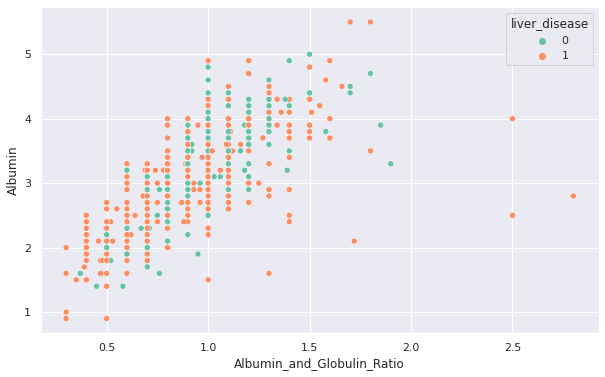

In [47]:
plt.figure(figsize = (10,6))
sns.scatterplot(x='Albumin_and_Globulin_Ratio',y='Albumin',hue = 'liver_disease',data=df, palette='Set2')
plt.show()

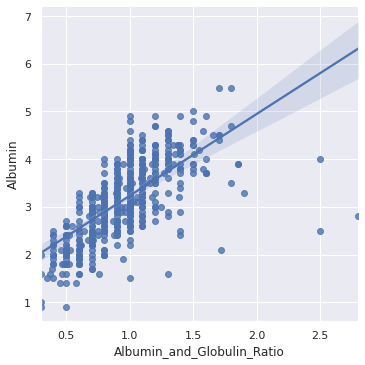

In [48]:
sns.lmplot(x='Albumin_and_Globulin_Ratio',y='Albumin',data=df, palette='Set2')
plt.show()

In [49]:
coor, p_value = pearsonr(df['Albumin'], df['Albumin_and_Globulin_Ratio']) 
print('Pearsons correlation: %.3f' % coor + "and p-value: {}".format(p_value)) 

Pearsons correlation: 0.686and p-value: 1.941271213352861e-82


There is a positive corellation between Albumin and Globulin Ratio & Albumin (about 68.6%)
### Total Proteins
The total protein test measures the total amount albumin and globulin in your body. t may also be used if you have unexpected weight loss, fatigue, or the symptoms of a kidney or liver disease. This test will also look at the ratio of albumin to globulin in your blood. This is known as the “A/G ratio.” [[5]](https://www.healthline.com/health/total-protein#purpose). 

In [50]:
df['Total_Protiens'].iplot(kind = 'hist', color = 'red', xTitle = 'Total Proteins', yTitle = 'Frequency', title = 'Distribution of Total Proteins')

### Total Proteins & Albumin

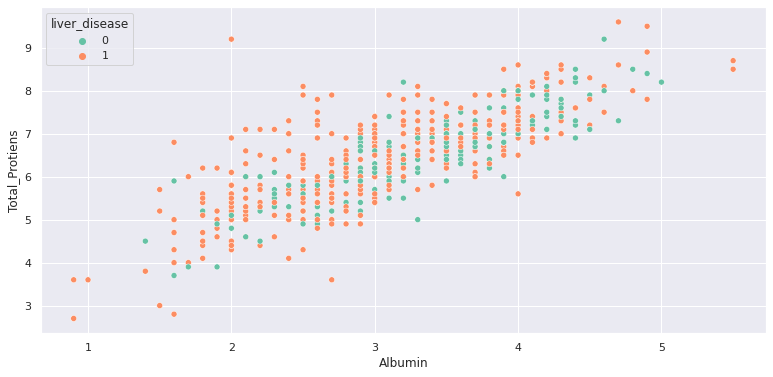

In [51]:
plt.figure(figsize = (13,6))
sns.scatterplot(x='Albumin',y='Total_Protiens',hue = 'liver_disease',data=df, palette='Set2')
plt.show()

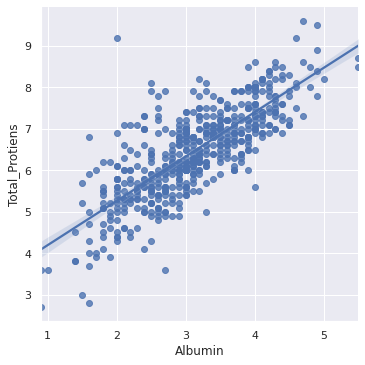

In [52]:
sns.lmplot(x = 'Albumin', y = 'Total_Protiens', data = df)
plt.show()

In [53]:
coor, _ = pearsonr(df['Total_Protiens'], df['Albumin']) 
print('Pearsons correlation: %.3f' % coor) 

Pearsons correlation: 0.784


### Total Proteins & Albumin_and_Globulin_Ratio

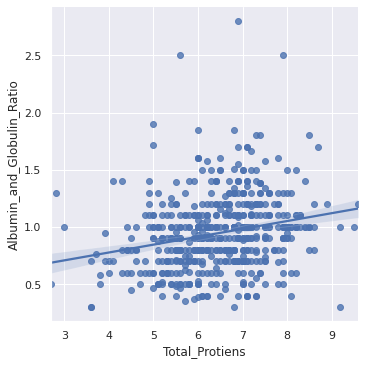

In [54]:
sns.lmplot(x = 'Total_Protiens', y = 'Albumin_and_Globulin_Ratio', data = df)

In [55]:
coor, _ = pearsonr(df['Total_Protiens'], df['Albumin_and_Globulin_Ratio']) 
print('Pearsons correlation: %.3f' % coor) 

Pearsons correlation: 0.234


The is a slight positive correlation
### Alkaline Phosphotase
 Alkaline Phosphotase (Alkaline Phospatase – ALP) is a homodimeric protein enzyme

In [56]:
df['Alkaline_Phosphotase'].iplot(kind = 'hist', color = 'red', xTitle = 'Alkaline_Phosphotase', yTitle = 'Frequency', title = 'Distribution of Alkaline Phosphotase')

### Age & Alkaline_Phosphotase

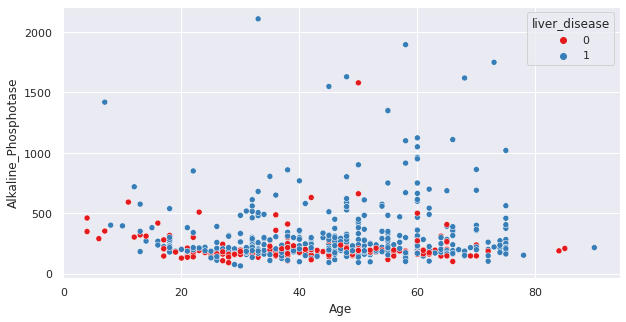

In [57]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'Age', y  = 'Alkaline_Phosphotase', data = df, hue = 'liver_disease', palette='Set1')
plt.show()

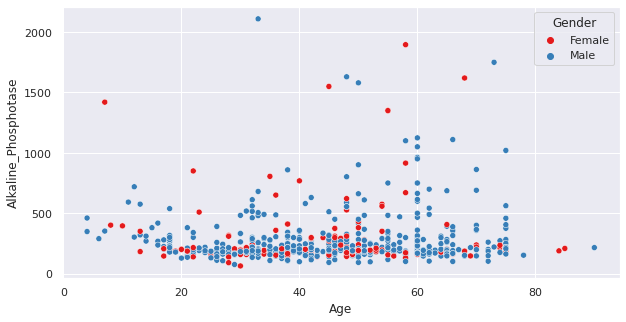

In [58]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'Age', y  = 'Alkaline_Phosphotase', data = df, hue = 'Gender', palette='Set1')
plt.show()

Higher-than-normal ALP levels for your age and sex may not necessarily mean you have a problem. (Children and teens naturally have higher levels than adults because their bones are still developing) [[6]](http://www.webmd.com/digestive-disorders/alkaline_phosphatase_test#2).

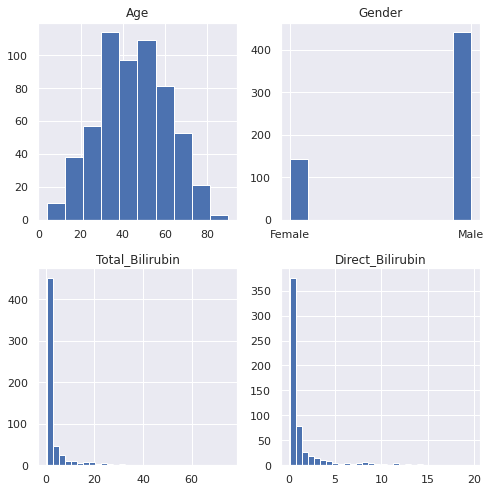

In [59]:
sns.set_theme()
fig, axs = plt.subplots(2, 2, figsize=(7,7))
axs[0][0].hist(x = df['Age'])
axs[0][0].set_title('Age')

axs[0][1].hist(x = df['Gender'])
axs[0][1].set_title('Gender')

axs[1][0].hist(x = df['Total_Bilirubin'], bins = 30)
axs[1][0].set_title('Total_Bilirubin')

axs[1][1].hist(x = df['Direct_Bilirubin'], bins = 30)
axs[1][1].set_title('Direct_Bilirubin')
#axs[2][0].hist(x = df['Alkaline_Phosphotase'])
fig.tight_layout()
plt.show()

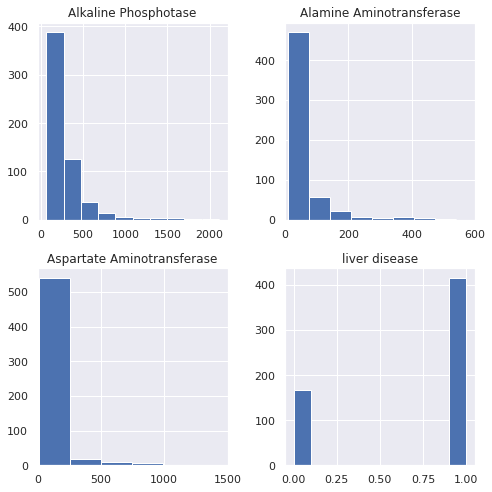

In [60]:
sns.set_theme()
fig, axs = plt.subplots(2, 2, figsize=(7,7))
axs[0][0].hist(x = df['Alkaline_Phosphotase'])
axs[0][0].set_title('Alkaline Phosphotase')

axs[0][1].hist(x = df['Alamine_Aminotransferase'], bins = 30)
axs[0][1].set_title('Alamine Aminotransferase')
axs[0][1].set_xlim(0,600)

axs[1][0].hist(x = df['Aspartate_Aminotransferase'], bins = 20)
axs[1][0].set_title('Aspartate Aminotransferase')
axs[1][0].set_xlim(0,1500)

axs[1][1].hist(x = df['liver_disease'])
axs[1][1].set_title('liver disease')

fig.tight_layout()
plt.show()

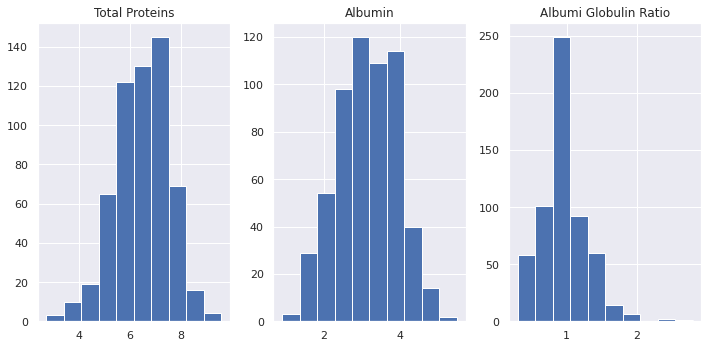

In [61]:
fig, axs = plt.subplots(1, 3, figsize=(10,5))
axs[0].hist(x = df['Total_Protiens'])
axs[0].set_title('Total Proteins')

axs[1].hist(x = df['Albumin'])
axs[1].set_title('Albumin')

axs[2].hist(x = df['Albumin_and_Globulin_Ratio'])
axs[2].set_title('Albumi Globulin Ratio')
fig.tight_layout()
plt.show()

### Putting it all together
There is a strong correlation between:
* Direct Bilirubin & Total Bilirubin 
* Total_Protiens & Albumin 
* Alamine_Aminotransferase& Aspartate_Aminotransferase 
* Albumin and Globulin Ration and Albumin 

💉

In [62]:
df.to_csv('teliko.csv', index_label = False)